In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from scipy.stats import norm,rayleigh

import pylab
import datetime

from tkinter import *
from tkinter import filedialog

from numpy import array, polyfit, poly1d
from pandas import DataFrame, to_datetime
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
def get_file():

# Select input file
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "C:\QGHL\Wave_data", title = "Select PRIM master file",\
                        filetypes = (("Prim files","*.prim"),("Seco files","*.seco"),("all files","*.*")))
    root.destroy()

    return(root.filename)

In [3]:
def site_info(id):
    
    site_details = [
    [1,'gc01','gold----01','Gold Coast buoy 1'],
    [2,'gc02','gold----02','Gold Coast buoy 2'],
    [3,'gc03','gold----03','Gold Coast buoy 3'],
    [4,'mool','mool----04','Mooloolaba'],
    [5,'gcb5','gcb5----05','Gold Coast BoB 5'],
    [6,'dble','dble----06','Double Island Point'],
    [7,'gcb6','gcb6----07','Gold Coast BoB 6'],
    [8,'yep7','yep7----08','Yeppoon'],
    [8,'cai9','cai9----08','Cairns test'],
    [9,'cair','cair----09','Cairns'],
    [10,'town','town----10','Townsville'],
    [11,'mky1','mky1----11','Mackay'],
    [12,'burn','burn----12','Burnett Heads'],
    [13,'bris','bris----13','Brisbane'],
    [14,'herv','herv----14','Hervey Bay'],
    [15,'hayp','hayp----15','Hay Point'],
    [16,'abbo','abbo----16','Abbot Point'],
    [17,'bown','bown----17','Bowen'],
    [18,'weip','weip----18','Weipa'],
    [19,'nsa1','noos----19','Noosa Near-shore 19'],
    [20,'nsa2','noos----20','Noosa Off-shore Buoy 20'],
    [21,'crns','crns----21','Cairns Near-shore'],
    [22,'bram','bram----22','Bramston Beach'],
    [23,'gold','gold----23','Gold Coast'],
    [24,'rl24','rlyn----24','Rosslyn Bay Near-shore'],
    [25,'rl25','rlyn----25','Rosslyn Bay Off-shore'],
    [26,'nsa3','noos----26','Noosa Near-shore Buoy 26'],
    [27,'kirr','kirr----27','Kirra'],
    [28,'twee','twee----28','Tweed River'],
    [29,'twe9','twe9----29','Tweed River Test'],
    [29,'barc','barc----29','Bar Cutting wave pole'],
    [30,'yblu','yblu----30','Yabulu'],
    [31,'kar1','kar1----31','Karumba in-shore'],
    [32,'kar2','kar2----32','Karumba off-shore'],
    [33,'luci','luci----33','Lucinda'],
    [34,'humb','humb----34','Humbug Reach Temp'],
    [35,'clev','clev----35','Cleveland Bay'],
    [37,'penn','penn----37','Pennefather'],
    [38,'nera','nera----38','Nerang'],
    [40,'mky2','mky2----40','Mackay Slade Point'],
    [41,'mky3','mky3----41','Mackay Blacks Beach'],
    [42,'mky4','mky4----42','Mackay Bucasia Beach'],
    [43,'mky5','mky5----43','Mackay Far Beach'],
    [45,'repu','repu----45','Repulse Bay'],
    [46,'haym','haym----46','Hayman Island'],
    [47,'lind','lind----47','Lindeman Island'],
    [48,'long','long----48','Long Island'],
    [49,'mkyi','mkyi----49','Mackay Inner'],
    [50,'hay9','hay9----50','Hay Point test'],
    [51,'nwb1','nwb1----51','Caloundra'],
    [52,'nmwb','nmwb----52','North Moreton Bay'],
    [53,'cmwb','cmwb----53','Central Moreton Bay'],
    [54,'calo','calo----54','Caloundra PoB'],
    [55,'tow9','tow9----55','Townsville test'],
    [56,'glax','glax----56','Gladstone Old'],
    [57,'her1','her1----57','Heron Is. Blue Pools'],
    [58,'her2','her2----58','Heron Is. Wistari Ch.'],
    [58,'alb9','alb9----58','Albatross Bay test'],
    [59,'alby','alby----59','Albatross Bay'],
    [60,'glad','glad----60','Gladstone GPA'],
    [61,'gla9','gla9----61','Gladstone Test'],
    [62,'gla8','gla8----62','Gladstone Temp'],
    [63,'mibt','mibt----63','Moreton Island BoB Test'],
    [64,'abot','abot----64','Abbot Point NQBP'],
    [66,'cal9','cal9----66','Caloundra PoB test'],
    [67,'bil9','bil9----67','Bilinga test'],
    [68,'varz','varz----68','Varzin Passage'],
    [69,'gann','gann----69','Gannet Passage'],
    [70,'woor','woor----70','Woorim'],
    [71,'toog','toog----71','Toogoom'],
    [72,'wood','wood----72','Woodgate'],
    [72,'weib','weib----72','Weipa Bob Test'],
    [73,'moor','moor----73','Moore Park'],
    [73,'deb3','deb3----73','TC Debbie BoB 3'],
    [74,'barg','barg----74','Bargara'],
    [74,'deb5','deb5----74','TC Debbie BoB 5'],
    [75,'coon','coon----75','Coonarr'],
    [76,'bndy','bndy----76','Bundaberg'],
    [77,'pbi1','pbi1----77','Palm Beach Inner 1'],
    [78,'pbo1','pbo1----78','Palm Beach Outer 1'],
    [79,'pbi2','pbi2----79','Palm Beach Inner 2'],
    [80,'mky9','mky9----80','Mackay Test'],
    [81,'bri9','bri9----81','Brisbane Test'],
    [82,'pbi3','pbi3----82','Palm Beach Inner 3'],
    [83,'pbi4','pbi4----83','Palm Beach Inner 4'],
    [84,'pbo2','pbo2----84','Palm Beach Outer 2'],
    [93,'more','more----93','Moreton Bay'],
    [94,'lois','lois----94','Low Islets'],
    [95,'dunk','dunk----95','Dunk Island'],
    [95,'w4m4','w4m4----95','Waves4 Mk4 test'],
    [97,'emu9','emu9----97','Emu Park test'],
    [97,'w4m3','w4m3----97','Waves4 Mk3 test Bris Oct2015'],
    [98,'emup','emup----98','Emu Park'],
    [99,'brib','brib----99','Bribie Island'],
    [99,'bobm','bobm----99','BoB'],
    [111,'mky6','mky6----11','Mackay Inner 6'],
    [901,'eden','eden----901','Eden'],
    [995,'holl','holl----995','Holloways Beach']]

    try:  
        site_name = (site_details[[site_details[i][0] for i in range(len(site_details))].index(id)][3])
    except:
        print("No details found for Id ",id)
        site_name = 'Un assigned!'

    return(site_name)

In [4]:
def first_dates(id):
# Identify the date of the first 6 hourly data point and the first 1 hourly data point.

#    1st column = wave site id number
#    2nd column = exact date of first 6 hour record in PV-Wave julian days
#    3rd column = exact date of first 1 hour record in PV-Wave julian days

# If no 6 hourly data exists in the masterfile then put 0.0 in 2nd column.
# If no 1 hourly data exists in the masterfile then put 0.0 in 3rd column.
# It is important that the above dates are when an actual record exists in the master file.

    site = [
    [1,79671.121,0.0],
    [2,79580.367,0.0],
    [3,79597.625,0.0],
    [4,0.0,90434.083],
    [6,0.0,90650.375],
    [8,81180.625,0.0],
    [9,83461.6250,88153.0007755],
    [10,83789.6250,87341.000011574],
    [11,83774.6250,87833.0],
    [12,81683.625,0.0],
    [13,83917.3750,87359.45833333],
    [14,81985.125,0.0],
    [15,83713.6250,87829.4791666666],
    [16,84061.6250,88082.0208333333],
    [17,82545.625,0.0],
    [18,83721.1250,88050.0208333333],
    [19,83337.375,0.0],
    [20,83337.375,0.0],
    [21,83461.625,0.0],
    [22,83734.625,0.0],
    [23,85627.0,87341.0],
    [24,85619.618,0.0],
    [25,85627.624,0.0],
    [26,86346.622,0.0],
    [27,86179.375,87037.0],
    [28,0.0,88510.50],
    [29,0.0,89410.028],
    [30,85288.610,0.0],
    [31,0.0,88345.042],
    [32,0.0,88348.562],
    [33,0.0,88558.417],
    [35,0.0,87772.750],
    [38,84674.875,0.0],
    [40,85280.630,0.0],
    [41,85707.885,0.0],
    [42,85981.624,0.0],
    [43,86708.630,0.0],
    [45,0.0,88285.0],
    [46,0.0,88796.0],
    [47,0.0,89154.0],
    [48,0.0,89368.667],
    [51,0.0,91672.0],
    [56,83006.625,0.0],
    [57,0.0,88938.458],
    [58,0.0,88938.479],
    [60,0.0,93877.000],
    [70,86208.384,87386.667],
    [71,84966.750,0.0],
    [72,85093.750,0.0],
    [73,85259.531,0.0],
    [74,85259.538,0.0],
    [75,85259.551,0.0],
    [93,0.0,90616.562],
    [94,0.0,89898.001],
    [95,0.0,89944.708],
    [98,0.0,89068.833],
    [99,84280.625,0.0],
    [995,0.0,89565.708],
    [111,0.0,90650.417],
    [813,83917.3750,0.0]]

    s6 = site[[site[i][0] for i in range(len(site))].index(id)][1]
    s1 = site[[site[i][0] for i in range(len(site))].index(id)][2]
    return(s6,s1)

Listing of data for site:  Gold Coast
From: 21-02-1987 08:55 To 31-05-2019 23:30
Maximum Possible Analysis Days (End date - Start date) =  11788
Maximum Possible Analysis Days (Last record - First record) = 11787.583
Total number of Records available =  400145
0  records with negative values removed
Found and removed  57  duplicate dates
This indicates a problem in masterfile regarding the sequence of dates and times of listed records.
Number of Records Used in Analysis =  400145
Start_of_six = 22-02-1987 00:00
Start_of_one = 02-11-1991 00:00
Enter required Hsig bin size (m): .2
Total gaps in data = 696.391 days


C:\Users\Jim\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


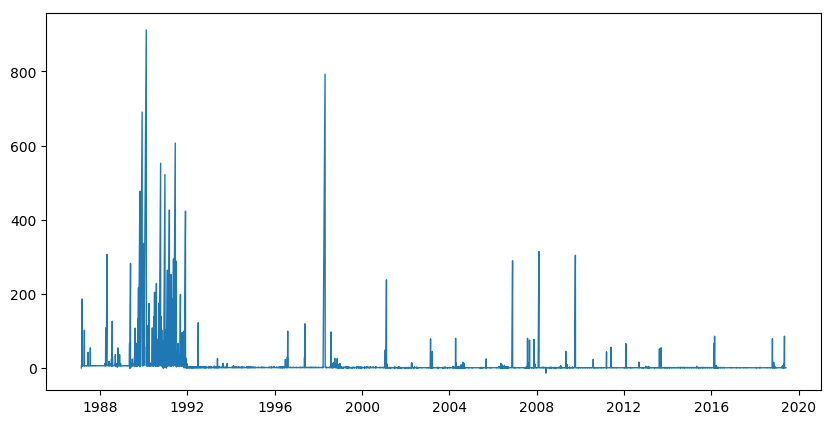

In [5]:
############################################
#    MAIN PROGRAM
############################################

# Create a DT based on the structure type of the PRIM Master File
# Details copied from PV~Wave file Master_structure_types_corrected.pro
pp1 = np.dtype([
    ('P1', 'B'),('P2', 'B'),('P3', 'B'),('P4', 'B'),('P5', 'B'),('P6', 'B'),('P7', 'B'),('P8', 'B'),
    ('P9', 'B'),('P10', 'B'),('P11', 'B'),('P12', 'B')])
pp2 = np.dtype([('p1', 'f'),('p2', 'f'),('p3', 'f'),('p4', 'f')])

rectype = np.dtype([
    ('Procid',pp1),
    ('Loc','i'),
    ('Year','i'),('Month','i'),('Day', 'i'),('Hour', 'i'),('Min', 'i'), ('Sec','i'), 
    ('Hsig','f'), ('Thsig','f'), ('Hrms', 'f'), ('Hmax', 'f'),('Tc', 'f'),('Tz', 'f'), ('H10', 'f'), 
    ('Th10', 'f'), ('Thmax', 'f'), ('Tzmax', 'f'), ('Hm0', 'f'),('T02', 'f'),('Tp', 'f'), ('EPS', 'f'), 
    ('Npts', 'i'),
    ('Param2',pp2)])

# Get name of input PRIM file
Input_Prim_File = get_file()

# Open file
f = open(Input_Prim_File)

# Read data from the Binary file into a DF based on the structure in the DT
recs = DataFrame(np.fromfile(f, rectype))

# Convert date/time column data into Dates and times
Record_time = pd.DataFrame({'Year': recs.Year,'month': recs.Month,'day': recs.Day,'hour': recs.Hour,\
                            'minute': recs.Min,'second': recs.Sec})

# Initially found an issue in the Townsville Master File - some year data for 1998 entered as 98
#    - this caused problems with date conversion, so included fix!
Record_time['Year'] = np.where(Record_time.Year < 1900, Record_time.Year + 1900, Record_time.Year)

# Insert Date column at start of DF
recs.insert(0,'Date',pd.to_datetime(Record_time))

# Get the first 6 hourly data point and the first 1 hourly data point
Location = recs['Loc'].head(1)
s6,s1 = first_dates(Location[0])
Site_name = site_info(Location[0]) 

# Convert Date to index, and remove unwanted columns from the DF
recs.set_index('Date', inplace=True)
recs = recs.drop(columns=['Procid','Loc','Year','Month','Day','Hour','Min','Sec',
                          'H10','Th10','Thmax','Tzmax','Hm0','T02','EPS','Param2'], axis=1)

recs['Date_value'] = recs.index
#recs['Back'] = recs.index.to_series().diff().dt.seconds.div(3600, fill_value=0)
recs['Back'] = recs['Date_value'].diff(1).dt.total_seconds().div(3600)

print('Listing of data for site: ',Site_name)
print('{:6s}{:%d-%m-%Y %H:%M}{:4s}{:%d-%m-%Y %H:%M}'.format('From: ',recs['Date_value'][0], ' To ',recs['Date_value'][-1]))
Number_of_days = recs['Date_value'][-1:]-recs['Date_value'][:1].values
Maximum_days = (Number_of_days.astype('timedelta64[h]')).item()/24.
Whole_days = int(Maximum_days) + 1
print('Maximum Possible Analysis Days (End date - Start date) = ',Whole_days)
print('{:62s}{:<5.3f}'.format('Maximum Possible Analysis Days (Last record - First record) = ',Maximum_days))

print('Total number of Records available = ',len(recs))

# remove all rows where column 'Hsig' < 0 and 'Tp' < 0
deleted = recs.query('Hsig < 0 | Tp < 0')
print(len(deleted),' records with negative values removed')
recs = recs.query('Hsig > 0 & Tp > 0')

# remove all rows where column 'Back' <= 0 
print('Found and removed ',len(recs.query('Back <= 0.0')),' duplicate dates')
print('This indicates a problem in masterfile regarding the sequence of dates and times of listed records.')

# need to re-calculate the time difference between records (now that erroneous data removed)
recs['Back'] = recs['Date_value'].diff(1).dt.total_seconds().div(3600)
recs['Forward'] = abs(recs['Date_value'].diff(-1).dt.total_seconds().div(3600))
recs['dur_back'] = recs['Date_value'].diff(1).dt.total_seconds().div(3600)/2
recs['dur_forward'] = abs(recs['Date_value'].diff(-1).dt.total_seconds().div(3600))/2
recs.iloc[0, recs.columns.get_loc('Back')] = 0
recs.iloc[0, recs.columns.get_loc('dur_back')] = 3
recs.iloc[len(recs)-1, recs.columns.get_loc('Forward')] = 0
recs.iloc[len(recs)-1, recs.columns.get_loc('dur_forward')] = 0.25

print('Number of Records Used in Analysis = ',len(recs))

# Convert Julian dates into date/Time values
# Note - In PV~Wave, the date/time value is interpreted as a day in a series of days that begins on September 14, 1752.
# See https://docs.roguewave.com/pv-wave/2017.0/pvwave_online_help/pvwave.html#page/Foundation/jul_to_dt.html
Start_of_six = datetime.date(1752, 9, 14) + datetime.timedelta(seconds=int(s6*24.*60*60))
Start_of_one = datetime.date(1752, 9, 14) + datetime.timedelta(seconds=int(s1*24.*60*60))

print('{:15s}{:%d-%m-%Y %H:%M}'.format('Start_of_six = ',Start_of_six))
print('{:15s}{:%d-%m-%Y %H:%M}'.format('Start_of_one = ',Start_of_one))

plt.figure(figsize=(10,5),dpi=100)
plt.plot(recs['Date_value'],recs['Back'],linewidth=1)

bin_size1 = input('Enter required Hsig bin size (m): ')

# setup bin arrays
nbin1 = int(max(recs['Hsig'])/float(bin_size1))+3
bin2 = [0,3,5,7,9,11,13,15]
nbin2 = len(bin2)

# Create a matrix of nbin1 rows and 8 columns
row, col  = nbin1, nbin2
Matrix = [[0 for x in range(col)] for y in range(row)] 

# Process backward and forward durations (days)

# Consider only dates when taking 12-hourly records
gaps = 0
Twelve_Hourly = recs.loc[(recs['Date_value'] < pd.Timestamp(Start_of_six))]
dur_allow_12 = 6.25
gaps = sum(Twelve_Hourly.loc[(Twelve_Hourly['dur_forward'] > dur_allow_12)].dur_forward-dur_allow_12) + \
           sum(Twelve_Hourly.loc[(Twelve_Hourly['dur_back'] > dur_allow_12)].dur_back-dur_allow_12)

# Consider only dates when taking 6-hourly records
Six_Hourly = recs.loc[(recs['Date_value'] >= pd.Timestamp(Start_of_six)) & (recs['Date_value'] < pd.Timestamp(Start_of_one))]
dur_allow_6 = 3.25
gaps = gaps+sum(Six_Hourly.loc[(Six_Hourly['dur_forward'] > dur_allow_6)].dur_forward-dur_allow_6) + \
           sum(Six_Hourly.loc[(Six_Hourly['dur_back'] > dur_allow_6)].dur_back-dur_allow_6)

# Consider only dates when taking 1-hourly records
One_Hourly = recs.loc[(recs['Date_value'] >= pd.Timestamp(Start_of_one))]
dur_allow_1 = 1.5
gaps = gaps+sum(One_Hourly.loc[(One_Hourly['dur_forward'] > dur_allow_1)].dur_forward-dur_allow_1) + \
           sum(One_Hourly.loc[(One_Hourly['dur_back'] > dur_allow_1)].dur_back-dur_allow_1)

##Gaps = Maximum_days - recs['Back'].sum()/24
print('{:21s}{:<5.3f}{:5s}'.format('Total gaps in data = ',gaps/24.,' days'))

Twelve_Hourly.loc[(Twelve_Hourly['dur_forward'] > dur_allow_12/2.)].dur_forward=dur_allow_12/2.
Twelve_Hourly.loc[(Twelve_Hourly['dur_back'] > dur_allow_12/2.)].dur_back=dur_allow_12/2.

Six_Hourly.loc[(Six_Hourly['dur_forward'] > dur_allow_6/2.)].dur_forward=dur_allow_6/2.
Six_Hourly.loc[(Six_Hourly['dur_back'] > dur_allow_6/2.)].dur_back=dur_allow_6/2.

One_Hourly.loc[(One_Hourly['dur_forward'] > dur_allow_1/2.)].dur_forward=dur_allow_1/2.
One_Hourly.loc[(One_Hourly['dur_back'] > dur_allow_1/2.)].dur_back=dur_allow_1/2.

Hs_bins = np.arange(float(bin_size1),float(bin_size1)*nbin1,float(bin_size1))
Tp_bins = bin2

#sum(recs.loc[(recs['Hsig'] < 0.2)].dur_forward + recs.loc[(recs['Hsig'] < 0.2)].dur_back)/24
#sum(recs.loc[(recs['Hsig'] >= 0.2) & (recs['Hsig'] < 0.4)].dur_forward)/24. +
##    recs.loc[(recs['Hsig'] >= 0.2) & (recs['Hsig'] < 0.4)].dur_back)/24.


In [6]:
aa,total=0,0
for i in range(0,nbin1):
    aa = sum(recs.loc[(recs['Hsig'] >= i*float(bin_size1)) & (recs['Hsig'] < i*float(bin_size1)+float(bin_size1))].dur_forward +
    recs.loc[(recs['Hsig'] >= i*float(bin_size1)) & (recs['Hsig'] < i*float(bin_size1)+float(bin_size1))].dur_back)/24.
    total+=aa
    print(i,aa)
print(total)

0 0.20833333333333334
1 103.09640046296296
2 846.0043981481481
3 2097.1856655092593
4 2574.2574594907414
5 2159.3538136574075
6 1490.4888599537042
7 944.7943344907409
8 574.8624942129628
9 343.21593749999994
10 235.30193287037036
11 141.50514467592592
12 91.20197337962964
13 53.91262152777778
14 39.614016203703706
15 23.437239583333337
16 16.765538194444446
17 16.57403935185185
18 8.102743055555555
19 5.618096064814814
20 5.740277777777777
21 5.8538194444444445
22 2.418443287037037
23 1.9895833333333333
24 1.6030844907407407
25 1.9690972222222223
26 0.625
27 0.625
28 0.771875
29 0.7604166666666666
30 0.13541666666666666
31 0.16666666666666666
32 0.10416666666666667
33 0.0
34 0.0
35 0.0625
36 0.0
37 0.0
11788.326388888885
